# Classifing hate speech tweets using logistic regression with Tf-Idf and Bag-of-Words vectorizers

## Loading the data set:

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [3]:
from datasets import load_dataset

dataset = load_dataset("tweets_hate_speech_detection")

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\maetu\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df = pd.DataFrame.from_dict(dataset['train'])
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# Model Building:

In [5]:
# Definition des Label-Vektors
y = df['label']

## Using TF-IDF Vectorizer

In [6]:
# Definition der Feature-Matrix
tf = text.TfidfVectorizer()

X_vec = tf.fit(df['tweet'])
X = X_vec.transform(df['tweet'])

print(X.shape)

(31962, 41392)


### Split data into train and test data

In [7]:
# Splitting of data into training and test data
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = ms.train_test_split(X, y, test_size=0.2, random_state = 17, stratify=y)

In [8]:
# Testing Stratification
print('There is {} training data, of which {}% is hate speech '.format(y_train.count(), round(y_train.sum()/y_train.count()*100,2)))
print('There is {} test data, of which {}% is hate speech '.format(y_test.count(), round(y_test.sum()/y_test.count()*100,2)))

There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


### Train Model

In [9]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score:', score)
    return model

In [10]:
model = simple_logistic_classify(X_train, y_train, X_test, y_test)

Test Score: 0.9465039887376818


### Evaluate Performance of the Model using  a Tf-Idf vectorizer

In [11]:
print(f'The hit rate with the simple logistic regression is approx. {round(100*model.score(X_test, y_test),2)}%')
print('Precision: %.3f' % precision_score(y_test, model.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, model.predict(X_test)))
print('Accuracy: %.3f' % accuracy_score(y_test, model.predict(X_test)))
print('F1 Score: %.3f' % f1_score(y_test, model.predict(X_test)))

The hit rate with the simple logistic regression is approx. 94.65%
Precision: 0.942
Recall: 0.252
Accuracy: 0.947
F1 Score: 0.398


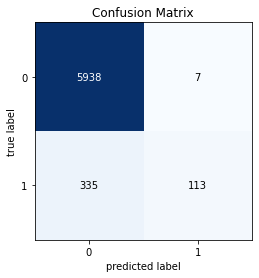

In [12]:
# Confusion-Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()

# Using a BoW Vectorizer

In [13]:
bow_converter = CountVectorizer()

Xc = bow_converter.fit_transform(df['tweet'])

print(Xc.shape)

(31962, 41392)


### Split Data

In [14]:
# Splitting of data into training and test data
(Xc_train, Xc_test, yc_train, yc_test) = ms.train_test_split(Xc, y, test_size=.2, random_state = 17)

### Train Model

In [15]:
bow_model = simple_logistic_classify(Xc_train, yc_train, Xc_test, yc_test)

Test Score: 0.9641795714062256


C:\Users\maetu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate Model Performance based on BOW Vectorizer

In [16]:
print(f'The hit rate with the simple logistic regression is approx. {round(100*bow_model.score(Xc_test, yc_test),2)}%')
print('Precision: %.3f' % precision_score(yc_test, bow_model.predict(Xc_test)))
print('Recall: %.3f' % recall_score(yc_test, bow_model.predict(Xc_test)))
print('Accuracy: %.3f' % accuracy_score(yc_test, bow_model.predict(Xc_test)))
print('F1 Score: %.3f' % f1_score(yc_test, bow_model.predict(Xc_test)))

The hit rate with the simple logistic regression is approx. 96.42%
Precision: 0.835
Recall: 0.579
Accuracy: 0.964
F1 Score: 0.684


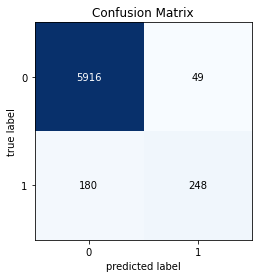

In [17]:
# Confusion-Matrix
cm = confusion_matrix(yc_test, bow_model.predict(Xc_test))

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()